In [10]:
!pip install matplotlib seaborn



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


# Gender Bias in Taylor Swift Songs

I will Analyze gender bias in the lyrics column and group the results by each different album

### Methodology
1. **Pronoun Analysis**: Counted the frequency of male, female, and neutral pronouns within the lyrics to quantify gender representation.



In [8]:
import pandas as pd

df = pd.read_csv('cleaned_lyrics_dataset.csv')

# Lists of pronouns to search for gender bias
male_pronouns = ['he', 'him', 'his']
female_pronouns = ['she', 'her', 'hers']
neutral_pronouns = ['they', 'them', 'theirs']

def count_pronouns(text, pronouns):
    """Count the occurrences of specified pronouns in the text."""
    words = text.split()
    return sum(word in pronouns for word in words)

df['male_pronouns'] = df['lyric'].apply(lambda x: count_pronouns(x, male_pronouns) if isinstance(x, str) else 0)
df['female_pronouns'] = df['lyric'].apply(lambda x: count_pronouns(x, female_pronouns) if isinstance(x, str) else 0)
df['neutral_pronouns'] = df['lyric'].apply(lambda x: count_pronouns(x, neutral_pronouns) if isinstance(x, str) else 0)

album_gender_bias = df.groupby('album_name').agg({
    'male_pronouns': 'sum',
    'female_pronouns': 'sum',
    'neutral_pronouns': 'sum'
}).reset_index()

album_gender_bias['total_pronouns'] = album_gender_bias['male_pronouns'] + album_gender_bias['female_pronouns'] + album_gender_bias['neutral_pronouns']
album_gender_bias

,album_name,male_pronouns,female_pronouns,neutral_pronouns,total_pronouns
0,1989 (Deluxe),23,6,32,61
1,Fearless (Taylor’s Version),29,12,15,56
2,Lover,34,0,29,63
3,Red (Deluxe Edition),58,6,12,76
4,Speak Now (Deluxe),17,26,30,73
5,Taylor Swift,43,14,4,61
6,evermore (deluxe version),33,18,17,68
7,folklore (deluxe version),6,29,24,59
8,reputation,32,2,52,86


# Visualisation of the result 

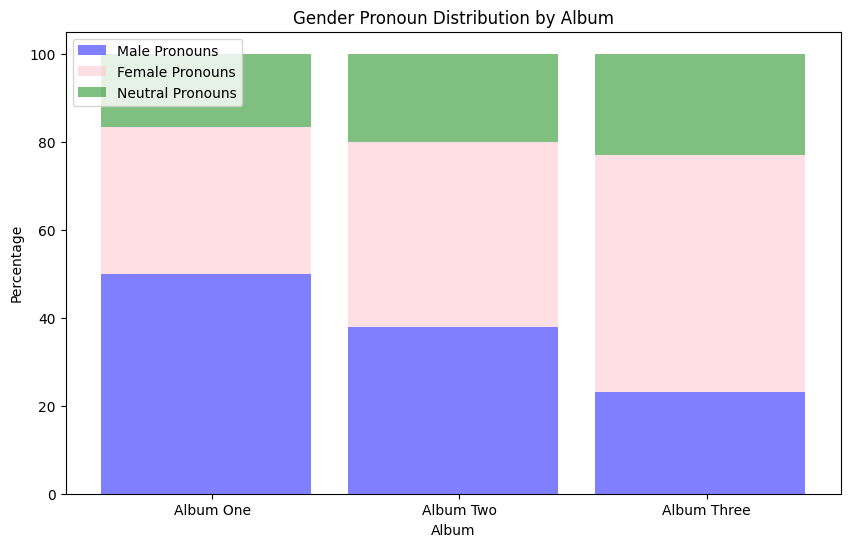